In [581]:
import os
import pandas as pd
import numpy as np
import glob
from import_data import data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

In [212]:
#%%
input = 'Input//'
output = 'Output//'
rawdata = 'Input//Rawdata//'
adjust_rawdata = 'Input//Adjust_rawdata//'
graph = 'visualization//'
graph_v = 'visualization//variable//' 
# os.mkdir(input)
# os.mkdir(output)
# os.mkdir(rawdata)
# os.mkdir(adjust_rawdata)
# os.mkdir(graph)
# os.mkdir(graph_v)

In [572]:
df = data()

c:\Users\630039\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (50,67,83,84,101) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## define_label

In [577]:
### gender --------------------------------------------------------------------
df['gender'] = df['gender'].replace({'ชาย':'male','หญิง':'female'})
### religion Name --------------------------------------------------------------------
religion = {'พุทธ':'Buddhist',
'อิสลาม':'Islam',
'คริสต์':'Christ',
'ฮินดู':'Hinduism',
'ซิกข์':'Sikhism',
'อื่นๆ':'Other'}
df['religion Name'] = df['religion Name'] .replace(religion)
## Country --------------------------------------------------------------------
'''array(['ไทย', nan, 'สหราชอาณาจักร'], dtype=object)'''
Country = {'ไทย':'Thai',
'สหราชอาณาจักร':'United Kingdom'}
df['Country'] = df['Country'] .replace(Country)
### education --------------------------------------------------------------------
'''['ปริญญาตรี', 'ป.ว.ช.', 'ปริญญาโท', 'ป.ว.ส.', nan, 'ประถมศึกษา',
       'มัธยมศึกษา', 'ปริญญาเอก', 'ป.ว.ท.', 'diploma holder',
       'up to diploma holder']'''
education = {
'ปริญญาตรี':'Bachelor degree',
'ป.ว.ช.':'Vocational Certificate',
'ปริญญาโท':'Master Degrees',
'ป.ว.ส.':'High Vocational Certificate',
'ประถมศึกษา':'Primary School',
'มัธยมศึกษา':'High School Certificate',
'ปริญญาเอก':'Doctor Degrees',
'ป.ว.ท.':'Certificate of Technical Vocation'}
df['education'] = df['education'].replace(education)
### marital Sts --------------------------------------------------------------------
marital_Sts = {
'สมรส(จดทะเบียน)':'Married (Registered)',
'สมรส(ไม่จดทะเบียน)':'Married (not registered)',
'โสด':'single',
'หย่า':'divorce',
'หม้าย':'widowed'}
df['marital Sts'] = df['marital Sts'].replace(marital_Sts)
### occ Type Desc TH --------------------------------------------------------------------
occ_Type = {'พนักงานและลูกจ้างกลุ่มธุรกิจบริการ':'service business employees', 'เจ้าของกิจการไม่จดทะเบียน':'owner is not registered',
       'ข้าราชการพลเรือน':'civil servant', 'พนักงานและลูกจ้างกลุ่มธุรกิจค่าปลีก':'retail business employees',
       'พนักงานและลูกจ้างกลุ่มธุรกิจผลิต':'production business employees',
       'พนักงานและลูกจ้างกลุ่มธุรกิจค้าส่ง':'wholesale business employees', 'เจ้าของกิจการจดทะเบียน':'registered business owner',
       'พนักงานรัฐวิสาหกิจ':'state enterprise', 'ข้าราชการการเมือง':'political official', 'ช่างเทคนิค':'technician',
       'พ่อบ้าน / แม่บ้าน':'butler/housewife', 'ลูกจ้างรัฐวิสาหกิจ':'state enterprise employees', 'พยาบาล':'nurse', 'สถาปนิก':'architect',
       'อื่นๆ':'other', 'มัณฑนากร จิตรกร ช่างภาพ':'artist', 'ผู้มีรายได้จากคอมมิชชัน':'Commission earners',
       'ไม่ได้ประกอบอาชีพ':'unemployed', 'วิชาชีพทางการศึกษา':'educational profession', 'ผู้มีอาชีพอิสระ':'freelance',
       'รับจ้างทั่วไป':'general employee', 'นักกฎหมาย ผู้ใช้วิชาชีพกฎหมาย':'lawyer', 'แพทย์':'doctor',
       'เภสัชกร':'pharmacist', 'นักบัญชี':'accountant', 'บริการ':'service', 'กายภาพบำบัด':'physical therapy'
}
df['occ Type Desc TH'] = df['occ Type Desc TH'].replace(occ_Type)

In [550]:
df['occ Type Desc TH'].unique()

array(['service business employees', 'owner is not registered',
       'civil servant', nan, 'retail business employees',
       'production business employees', 'wholesale business employees',
       'registered business owner', 'state enterprise',
       'political official', 'technician', 'butler/housewife',
       'state enterprise employees', 'nurse', 'architect', 'other',
       'artist', 'Commission earners', 'unemployed',
       'educational profession', 'freelance', 'general employee',
       'lawyer', 'doctor', 'pharmacist', 'accountant', 'service',
       'physical therapy'], dtype=object)

In [552]:
df_na = df[df.isnull().any(axis=1)]
df_na.isnull().sum()
# df[df['religion Name'].isna()]

appl No                  0
id No                    0
Age                    351
gender                   6
religion Name          351
Country                351
education              352
marital Sts            351
occ Desc TH            448
occ Type Desc TH       826
pos Desc TH            381
bus Typ ISICName       381
src Inc                374
Wrk Year               379
pgm Secure               0
ADR01Home Own Typ      699
ADR01Home Owner        465
รายได้สุทธิต่อเดือน    803
term                   437
dtype: int64

In [390]:
def group_data(df,r,c):
    df = df[[r,c]].groupby(by=[c], dropna=False).count()    
    df.reset_index(inplace =True)
    return df

## Graph

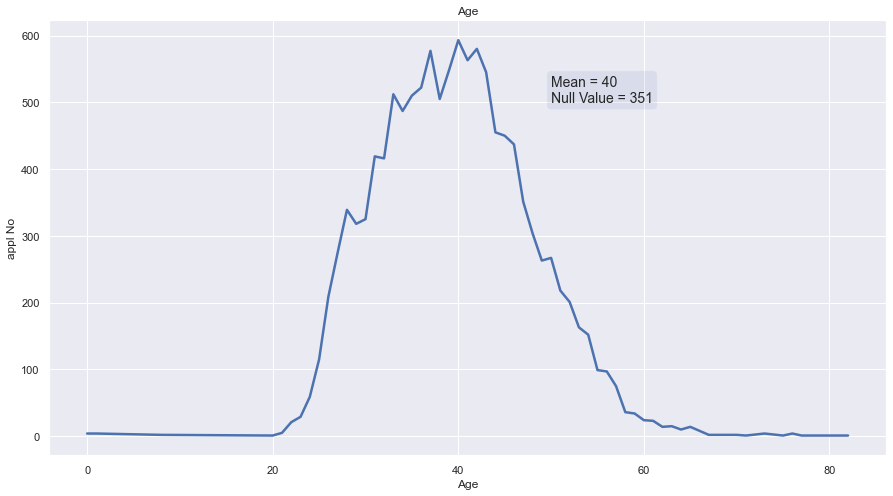

In [583]:
## Age
Age_M = round(df["Age"].mean())
df_v = group_data(df,'appl No','Age')
sns.lineplot(data=df_v, x="Age", y="appl No",linewidth=2.5).set(title='Age')
sns.set_style("darkgrid")
# plt.grid()
textstr = '\n'.join((f'Mean = {Age_M}',f'Null Value = {df_v.iloc[62,1]}' ))
plt.text(50, 500, textstr, fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'Age.jpg') 

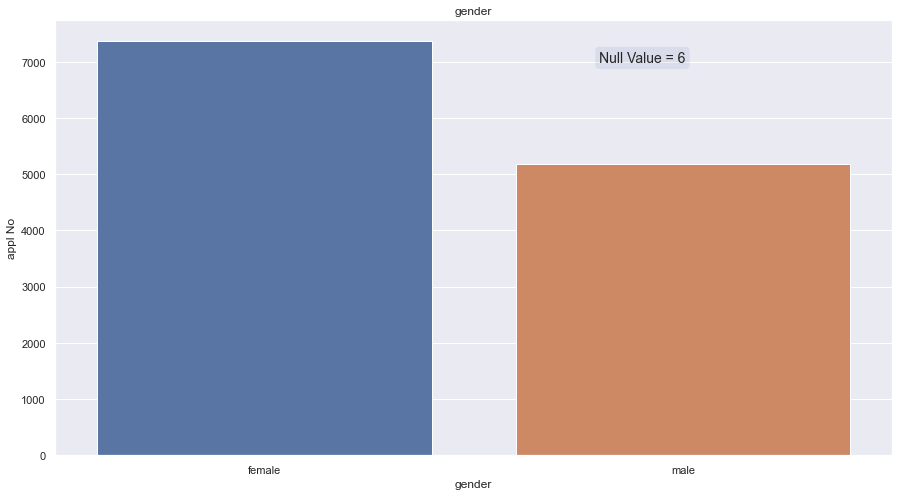

In [584]:
## Age 
df_v = group_data(df,'appl No','gender')
sns.barplot(data=df_v, x="gender", y="appl No",).set(title='gender')
sns.set_style("darkgrid")
plt.text(0.8, 7000, f'Null Value = {df_v.iloc[2,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'gender.jpg') 

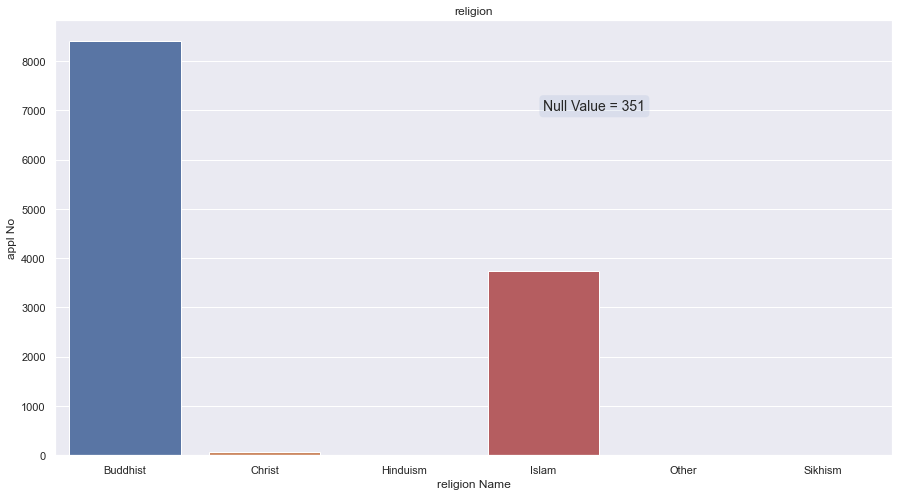

In [585]:
## religion Name 
''' religion = {'พุทธ':'1',
                'อิสลาม':'2',
                'คริสต์':'3',
                'ฮินดู':'4',
                'ซิกข์':'5',
                'อื่นๆ':'6'}'''
df_v = group_data(df,'appl No','religion Name')
sns.barplot(data=df_v, x="religion Name", y="appl No",).set(title='religion')
sns.set_style("darkgrid")
# plt.text(3, 4000,'Buddhist : 1\nIslam : 2\nChrist: 3\nHinduism: 4\nSikhism:5\nOther:6' ,fontsize=12, bbox=dict(boxstyle="round", alpha=0.1))
plt.text(3, 7000, f'Null Value = {df_v.iloc[6,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'religion Name.jpg') 

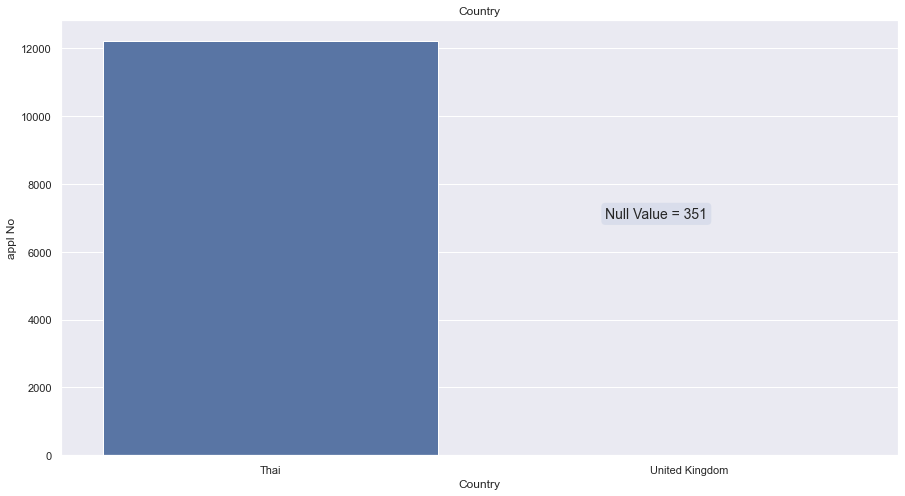

In [586]:
## Country
df_v = group_data(df,'appl No','Country')
sns.barplot(data=df_v, x="Country", y="appl No",).set(title='Country')
plt.text(0.8, 7000, f'Null Value = {df_v.iloc[2,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'Country.jpg') 

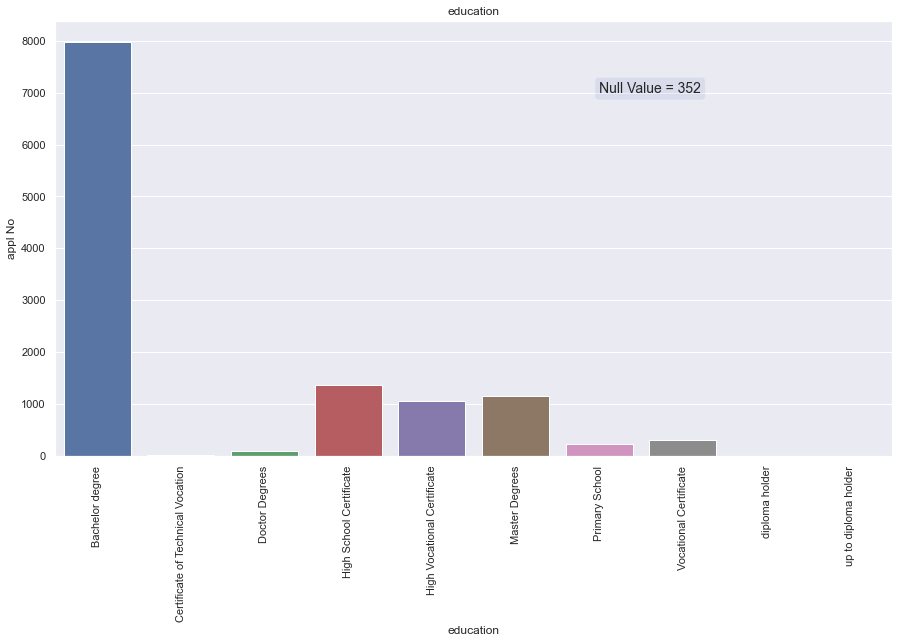

In [587]:
## education
'''ปริญญาตรี':'Bachelor degree',
'ป.ว.ช.':'Vocational Certificate',
'ปริญญาโท':'Master Degrees',
'ป.ว.ส.':'High Vocational Certificate',
'ประถมศึกษา':'Primary School',
'มัธยมศึกษา':'High School Certificate',
'ปริญญาเอก':'Doctor Degrees',
'ป.ว.ท.':'Certificate of Technical Vocation'''
df_v = group_data(df,'appl No','education')
sns.barplot(data=df_v, x="education", y="appl No",).set(title='education')
plt.xticks(rotation=90)
plt.text(6, 7000, f'Null Value = {df_v.iloc[10,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.gcf()
plt.savefig(graph_v+'education.jpg') 

Text(1, 3000, 'Null Value = 351')

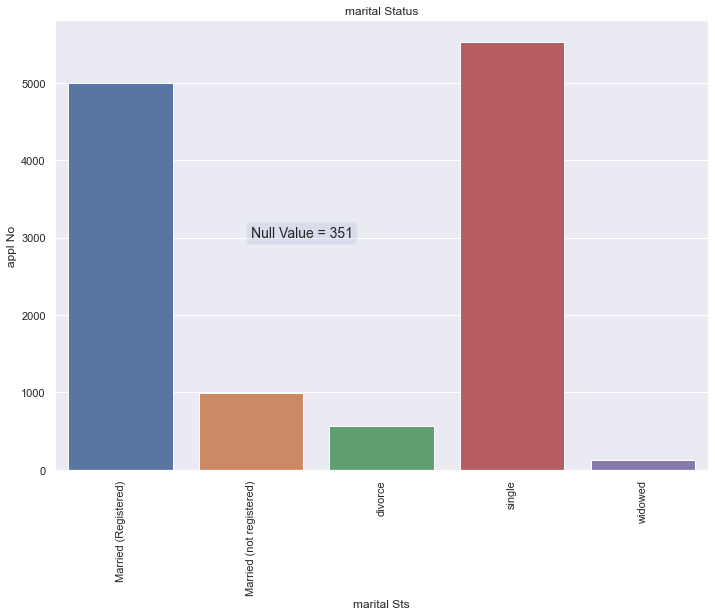

In [566]:
## marital Sts
'''สมรส(จดทะเบียน)':'Married (Registered)',
'สมรส(ไม่จดทะเบียน)':'Married (not registered)',
'โสด':'single',
'หย่า':'divorce',
'หม้าย':'widowed'''
df_v = group_data(df,'appl No','marital Sts')
sns.barplot(data=df_v, x="marital Sts", y="appl No",).set(title='marital Status')
plt.xticks(rotation=90)
plt.text(1, 3000, f'Null Value = {df_v.iloc[5,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
# plt.gcf()
# plt.savefig(graph_v+'marital_Status.jpg') 

Text(8, 3000, 'Null Value = 826')

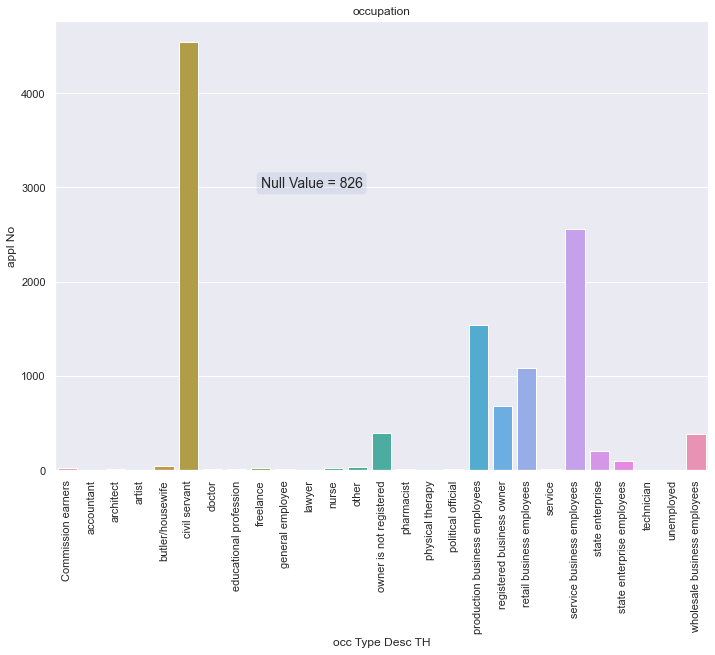

In [578]:
# occ Desc TH     
'''พนักงานและลูกจ้างกลุ่มธุรกิจบริการ':'service business employees', 'เจ้าของกิจการไม่จดทะเบียน':'owner is not registered',
       'ข้าราชการพลเรือน':'civil servant', 'พนักงานและลูกจ้างกลุ่มธุรกิจค่าปลีก':'retail business employees',
       'พนักงานและลูกจ้างกลุ่มธุรกิจผลิต':'production business employees',
       'พนักงานและลูกจ้างกลุ่มธุรกิจค้าส่ง':'wholesale business employees', 'เจ้าของกิจการจดทะเบียน':'registered business owner',
       'พนักงานรัฐวิสาหกิจ':'state enterprise', 'ข้าราชการการเมือง':'political official', 'ช่างเทคนิค':'technician',
       'พ่อบ้าน / แม่บ้าน':'butler/housewife', 'ลูกจ้างรัฐวิสาหกิจ':'state enterprise employees', 'พยาบาล':'nurse', 'สถาปนิก':'architect',
       'อื่นๆ':'other', 'มัณฑนากร จิตรกร ช่างภาพ':'artist', 'ผู้มีรายได้จากคอมมิชชัน':'Commission earners',
       'ไม่ได้ประกอบอาชีพ':'unemployed', 'วิชาชีพทางการศึกษา':'educational profession', 'ผู้มีอาชีพอิสระ':'freelance',
       'รับจ้างทั่วไป':'general employee', 'นักกฎหมาย ผู้ใช้วิชาชีพกฎหมาย':'lawyer', 'แพทย์':'doctor',
       'เภสัชกร':'pharmacist', 'นักบัญชี':'accountant', 'บริการ':'service', 'กายภาพบำบัด':'physical therapy'''
df_v = group_data(df,'appl No','occ Type Desc TH')
sns.barplot(data=df_v, x="occ Type Desc TH", y="appl No",).set(title='occupation')
plt.xticks(rotation=90)
plt.text(8, 3000, f'Null Value = {df_v.iloc[27,1]}', fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
# plt.gcf()
# plt.savefig(graph_v+'occupation.jpg') 

In [579]:
df_v 

,occ Type Desc TH,appl No
0,Commission earners,25
1,accountant,2
2,architect,17
3,artist,1
4,butler/housewife,45
5,civil servant,4540
6,doctor,9
7,educational profession,11
8,freelance,27
9,general employee,8
